# BUSINESS PROBLEM:
# Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# HYPOTHESIS: Action and Horror Movies will be the highest grossing movies

# Assumption BEST = HIGHEST ROI

# 3 questions to answer:
# 1)what is the highest grossing genre
# 2)which director earns the most money
# 3)which actors earn the most money

In [1]:
import pandas as pd # import for working with a data frame
import numpy as np # import for working with scientific calculations
import matplotlib.pyplot as plt # import for drawing basic graps

 # draw graph in notebook
%matplotlib inline

# Dataset from kaggle imdb top 50 movies

In [3]:
#create df
df_movies = pd.read_csv(r"C:\Users\Jay\Documents\FlatironDataSci\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\mySubmit\IMDB-Movie-Data.csv", encoding = "ISO-8859-1")
#preview data
df_movies.head()
#print("moviesDF:\n\n{}\n".format(df_movies.head()))

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [22]:
#exploring the data
print(df_movies.info(),"\n\n")
print(df_movies.describe(),"\n\n")
print("\n\nNulls:\n\n{}\n\n**************************************\n\n".format(df_movies.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB
None 


              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.

#  graph the data and see what the total in the data set is

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

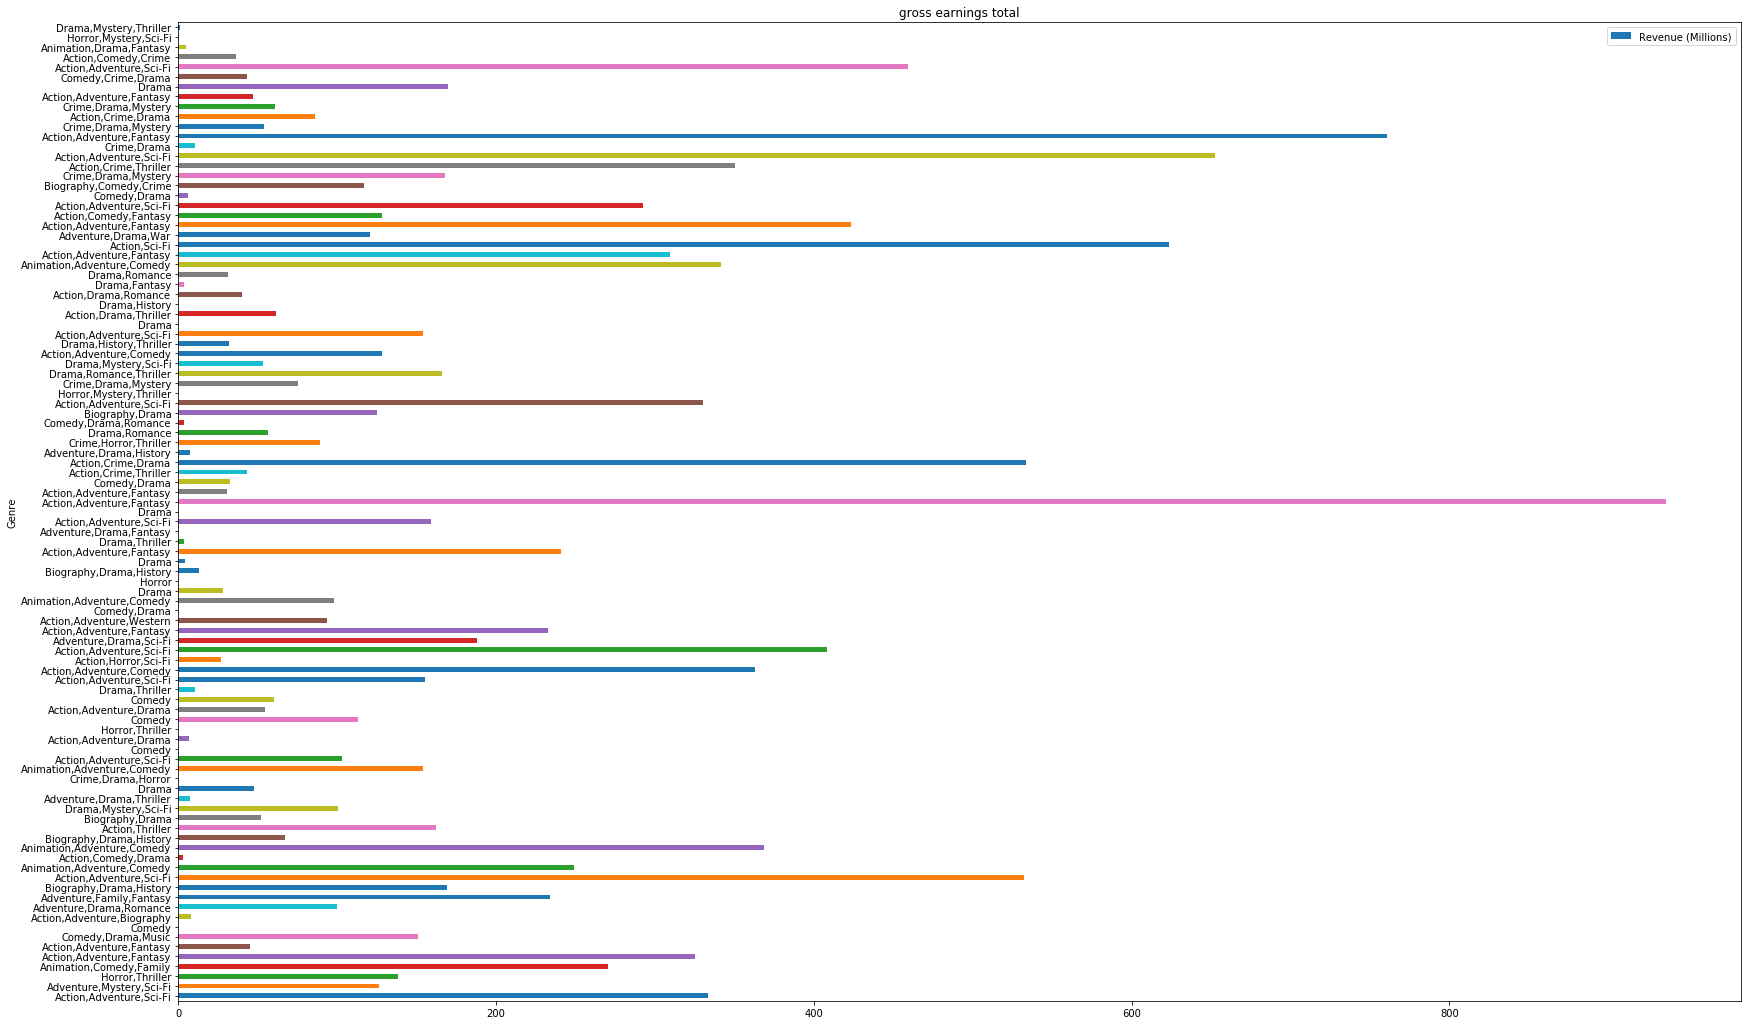

In [23]:
df_movies.head()
#df_movies.drop(['Description', 'Actors','Runtime (Minutes)',Year'], axis=1,inplace=True)
print(df_movies.head())
df_movies.iloc[0:99].plot(x='Genre', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')


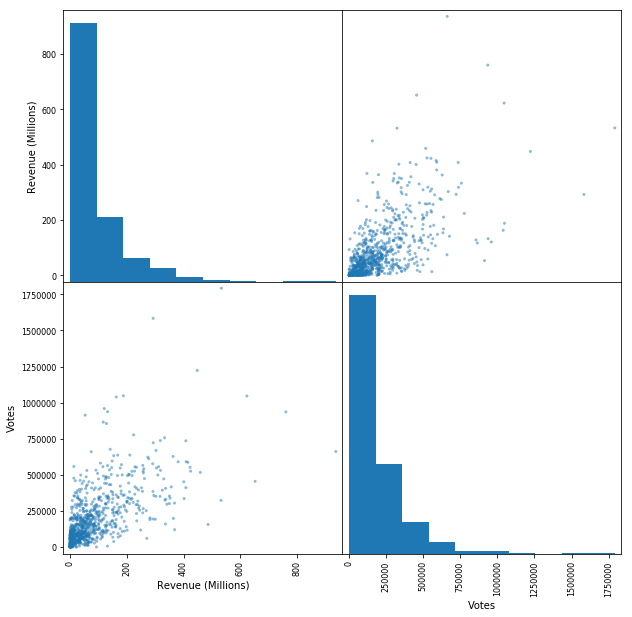

In [24]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df_movies[['Genre', 'Revenue (Millions)', 'Votes']], figsize=(10,10));


# Top 50 Genre was the higgest grossing?

     Revenue (Millions)                    Genre   Votes
160                 NaN             Thriller,War    5926
942                 NaN                 Thriller    1292
512               64.51          Sci-Fi,Thriller  170897
183                 NaN                   Sci-Fi    1176
706               62.45  Romance,Sci-Fi,Thriller  208632


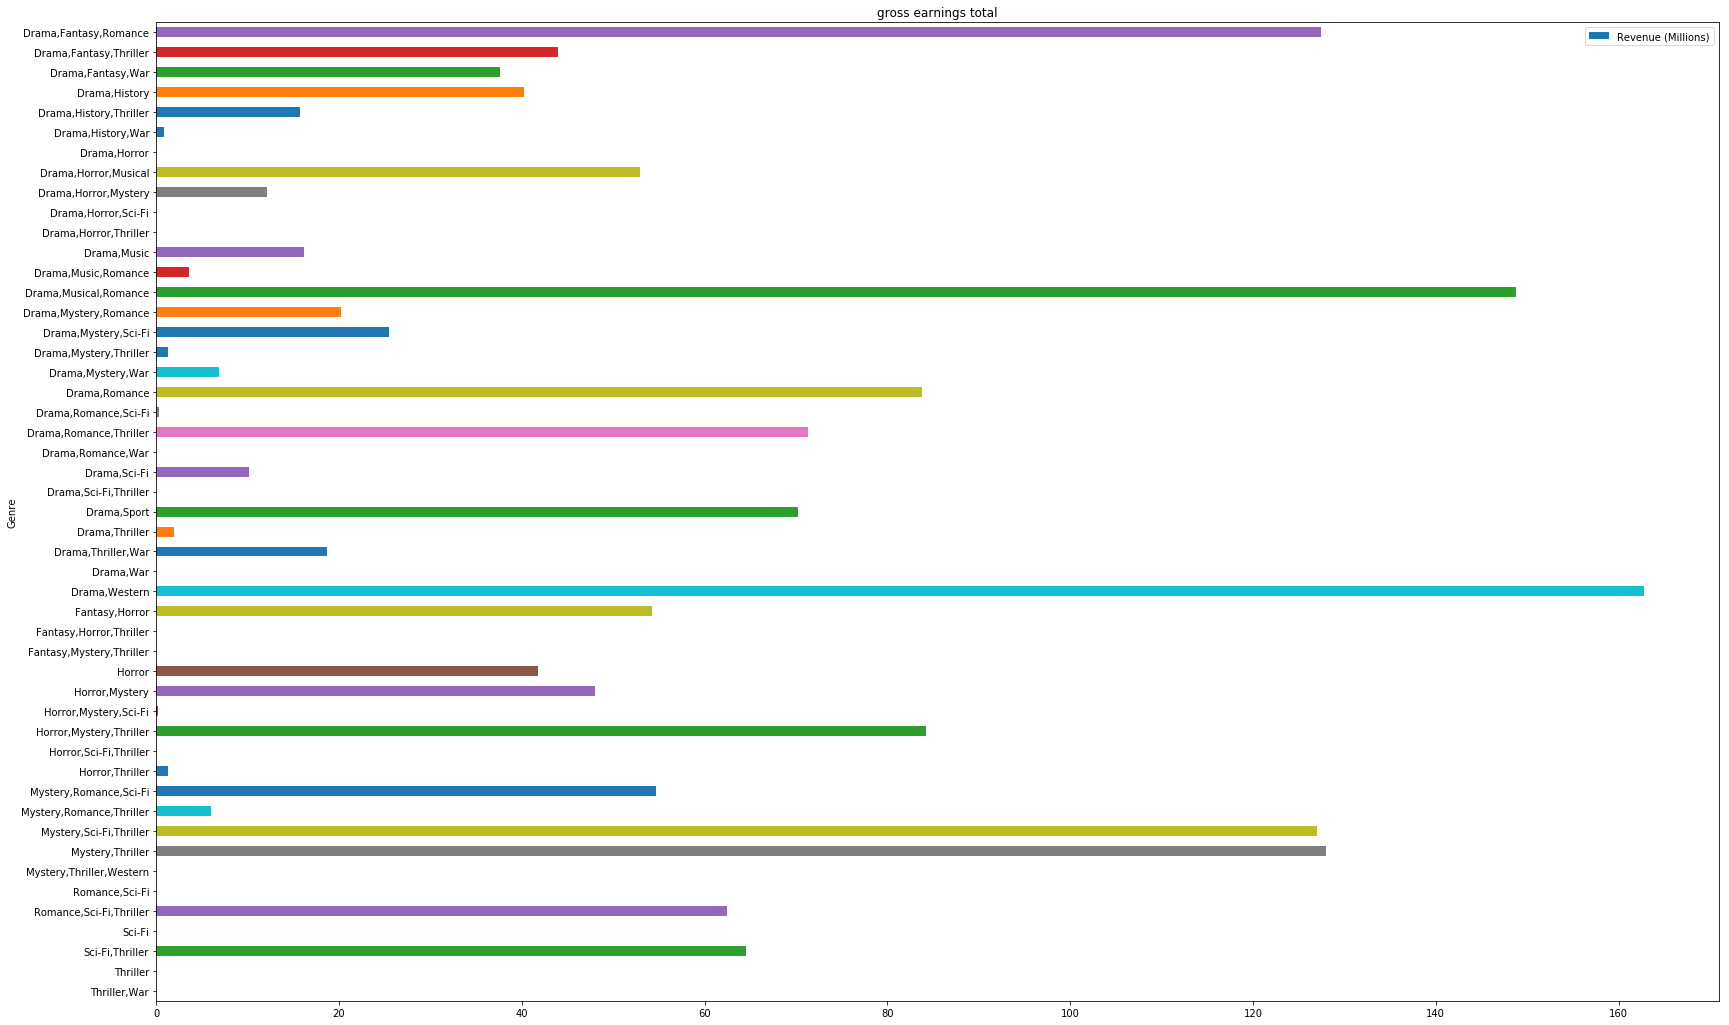

In [38]:

#creating a new data frame with only useful data regarding gorss earnings
df_movies_money = df_movies[['Revenue (Millions)', 'Genre', 'Votes']].copy()
#cleaning data
df = df_movies_money.sort_values(by=['Genre'],ascending=False)
df2 = df.drop_duplicates(subset=['Genre'])
#printing preview of data
print(df2.head())
#plot which genre creates the higgest gorss earnings

df2.iloc[0:49].plot(x='Genre', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')

# Top 10 Genre

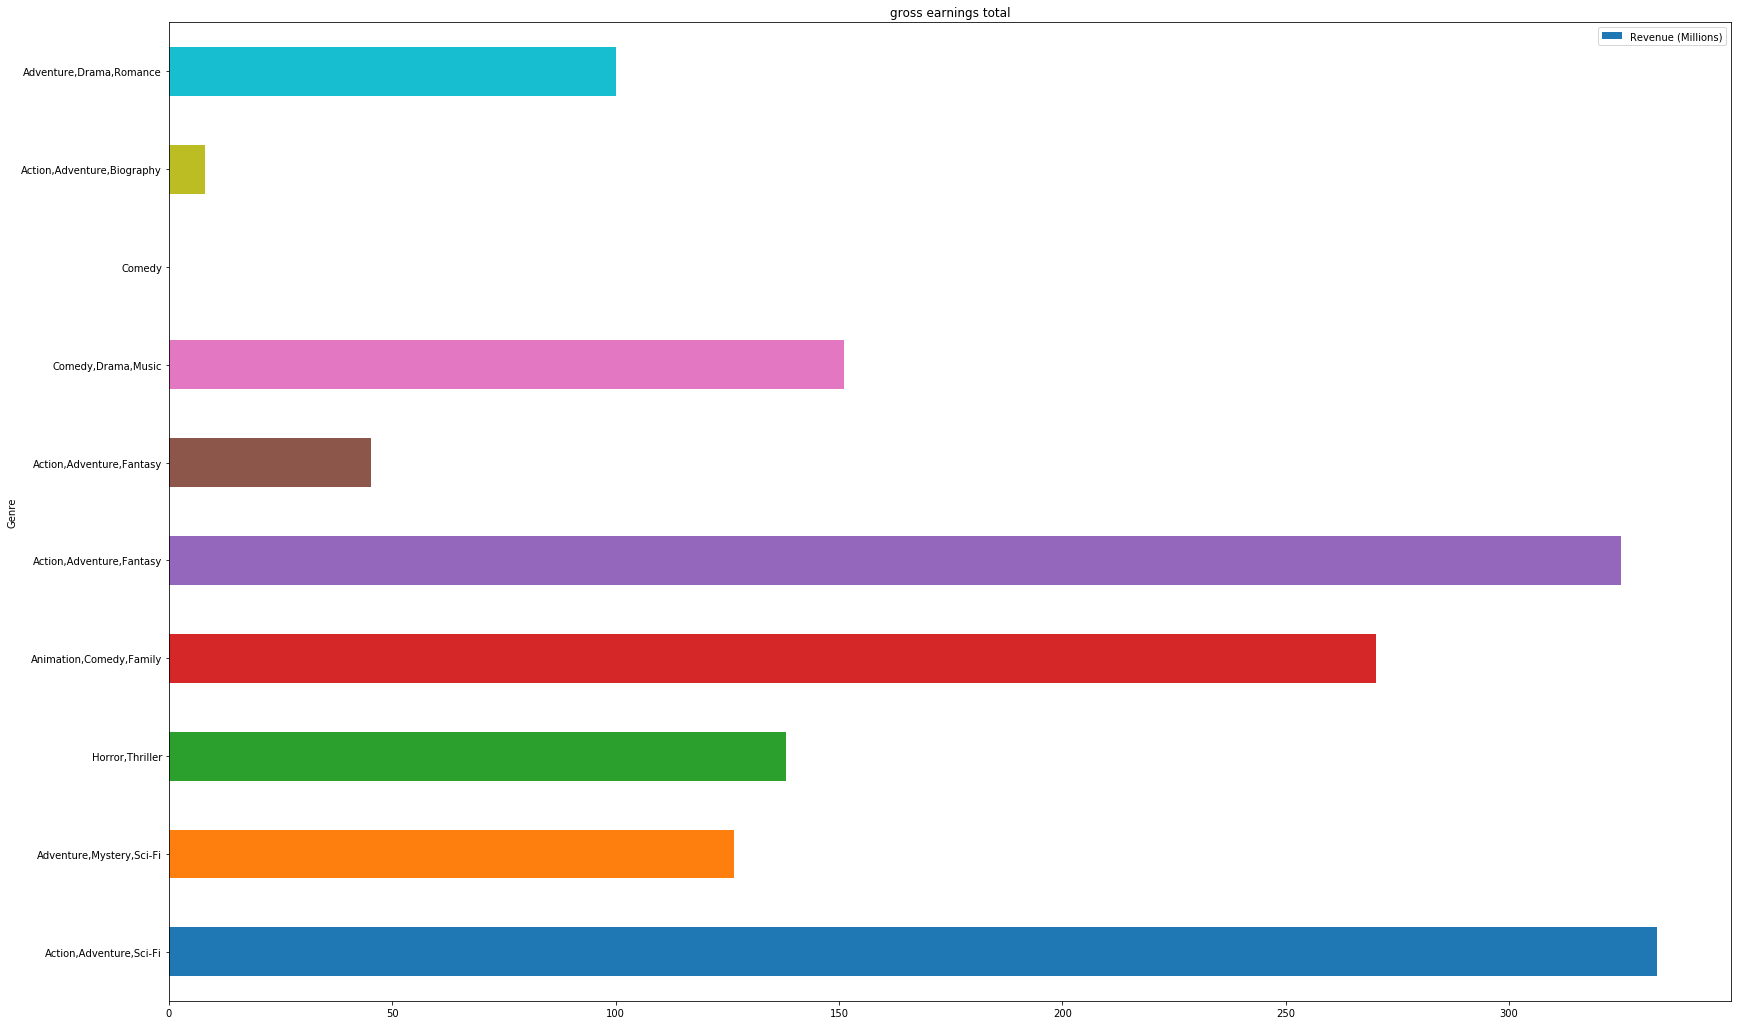

In [14]:
df_movies.iloc[0:10].plot(x='Genre', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')

# Top Genres

In [18]:
df_movies.groupby('Genre')['Revenue (Millions)'].sum().nlargest(3)


Genre
Action,Adventure,Sci-Fi       10461.51
Animation,Adventure,Comedy     5754.75
Action,Adventure,Fantasy       5248.29
Name: Revenue (Millions), dtype: float64

# How revenue is affected by different factors

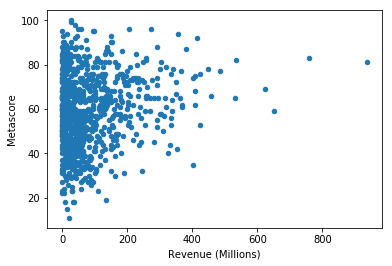

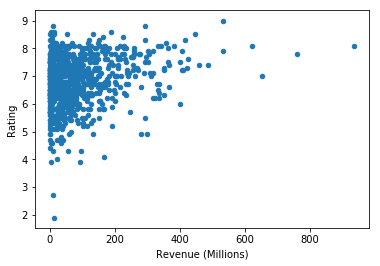

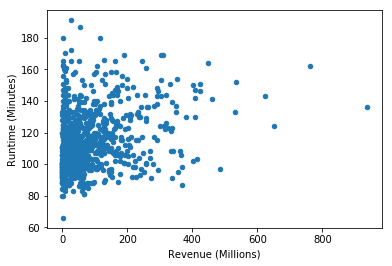

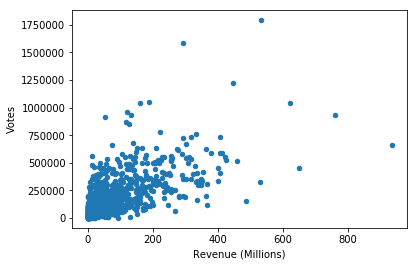

In [17]:
df_movies.plot.scatter(x='Revenue (Millions)',y='Metascore');
df_movies.plot.scatter(x='Revenue (Millions)',y='Rating');
df_movies.plot.scatter(x='Revenue (Millions)',y='Runtime (Minutes)');
df_movies.plot.scatter(x='Revenue (Millions)',y='Votes');

# Top 50 director provides the most revenue?

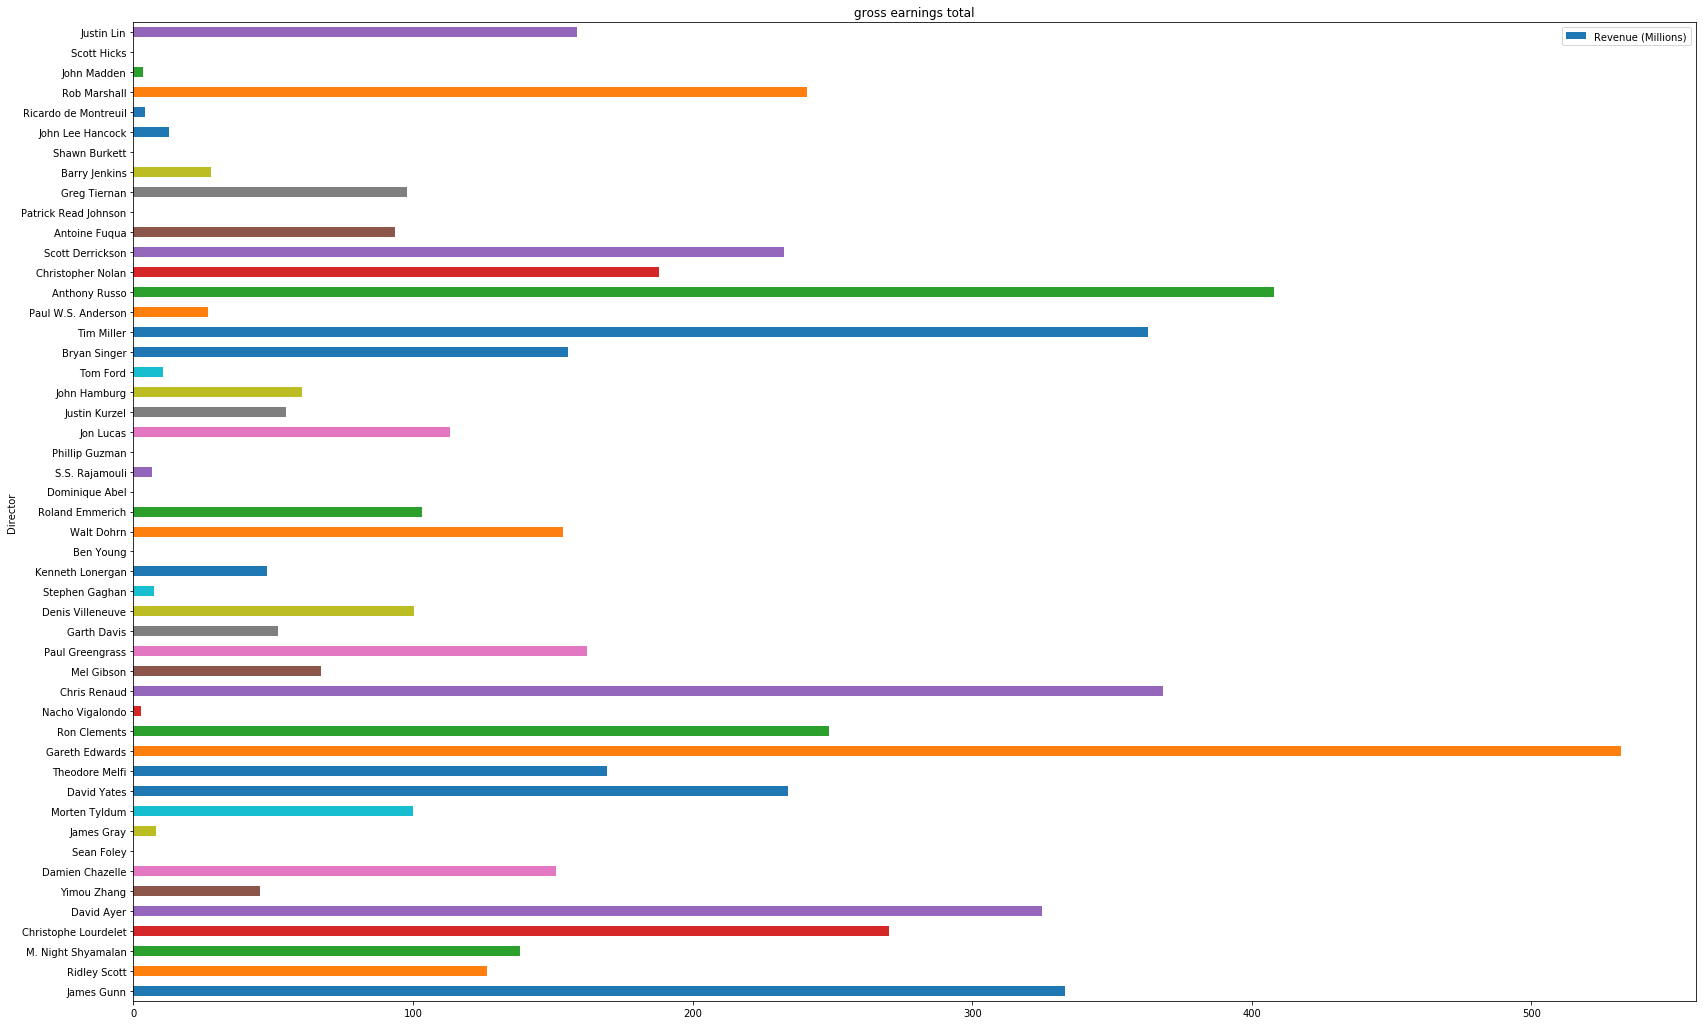

In [39]:
df_movies.iloc[0:49].plot(x='Director', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')

# Top 10 directors

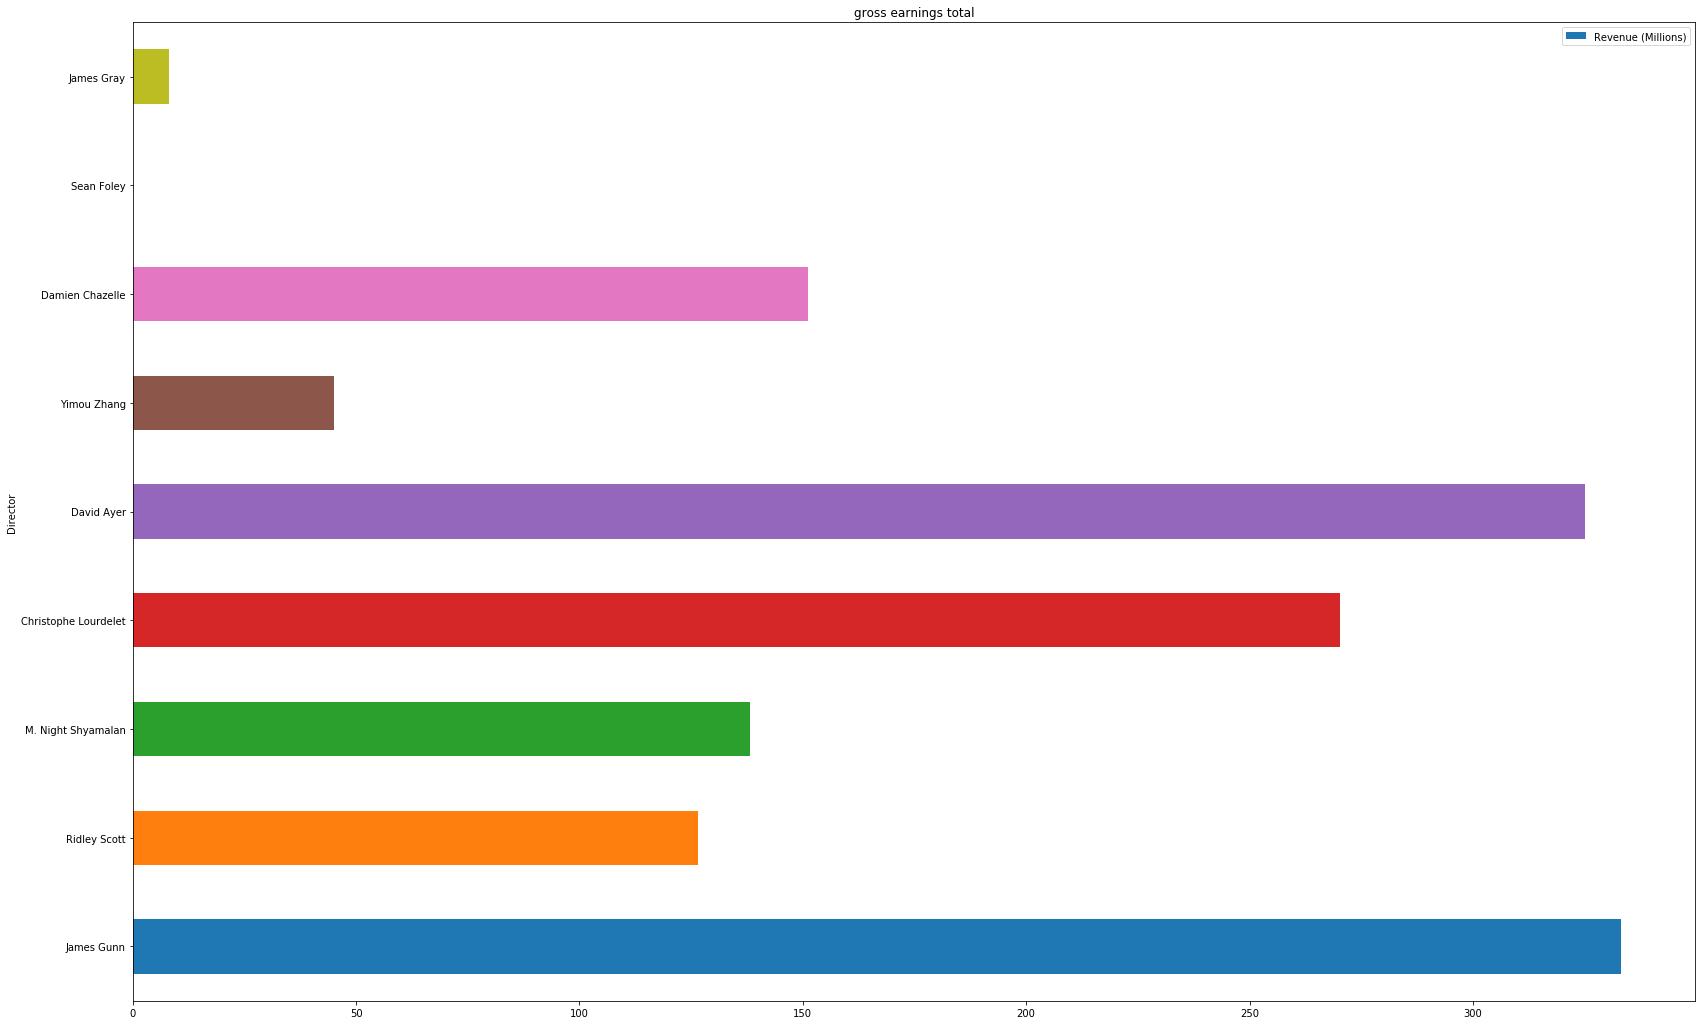

In [45]:
df_movies.iloc[0:9].plot(x='Director', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')

# Which actors provide the best ROI?

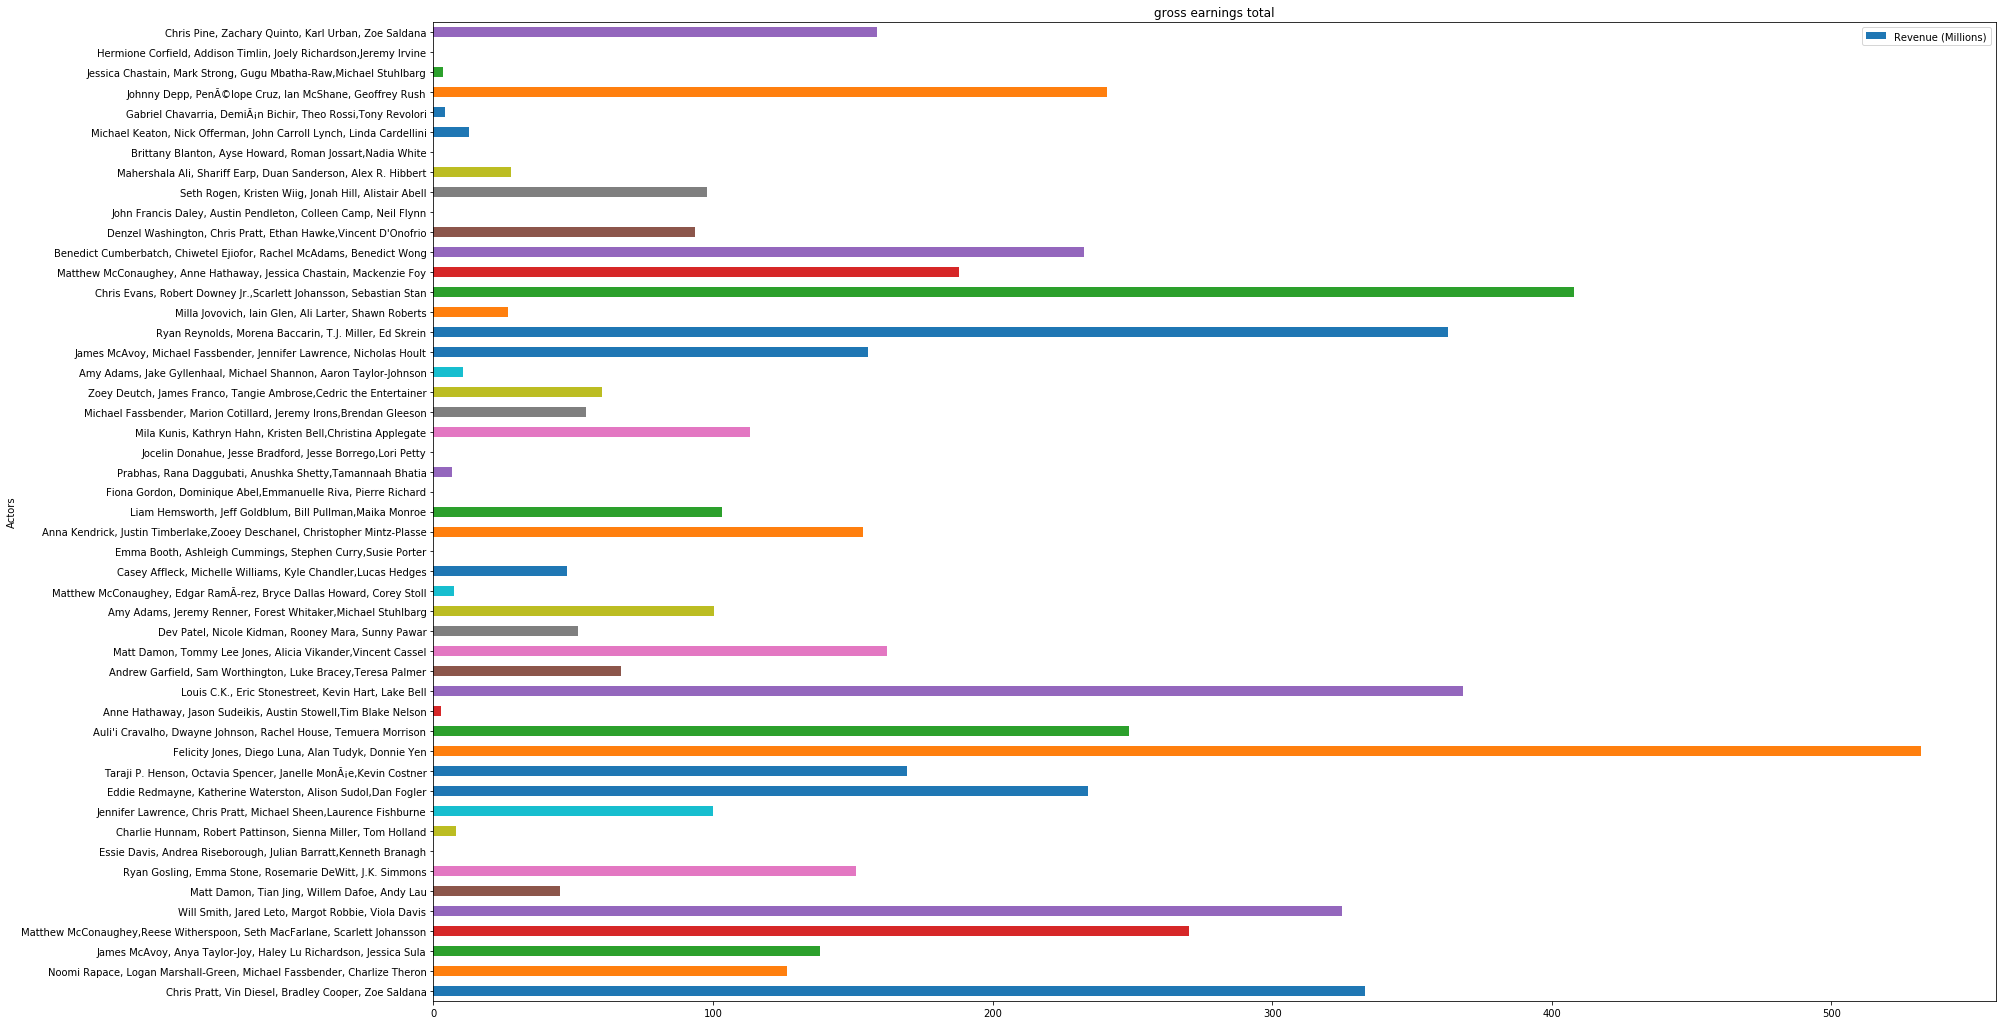

In [43]:
df_movies.iloc[0:49].plot(x='Actors', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')

# Top  actors

In [37]:
df_cast = df_movies[['Actors','Year','Revenue (Millions)']]
df_cast.dropna()


,Actors,Year,Revenue (Millions)
0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,333.13
1,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,126.46
2,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,138.12
3,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,270.32
4,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,325.02
5,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,45.13
6,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,151.06
8,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,8.01
9,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,100.01
10,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,234.02


In [38]:
df_cast = df_cast.ix[df_cast.groupby(['Year'])['Revenue (Millions)'].idxmax()]
df_cast

C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Actors,Year,Revenue (Millions)
78,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",2006,423.03
344,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th...",2007,336.53
54,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,533.32
87,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,760.51
688,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",2010,414.98
114,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,380.96
76,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,623.28
578,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,424.65
331,"Bradley Cooper, Sienna Miller, Kyle Gallner, C...",2014,350.12
50,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,936.63


# quick revenue graph of above

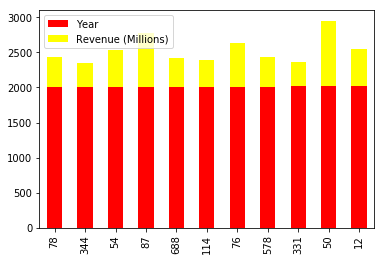

In [40]:
df_cast.plot(kind='bar', stacked=True, colormap='autumn')

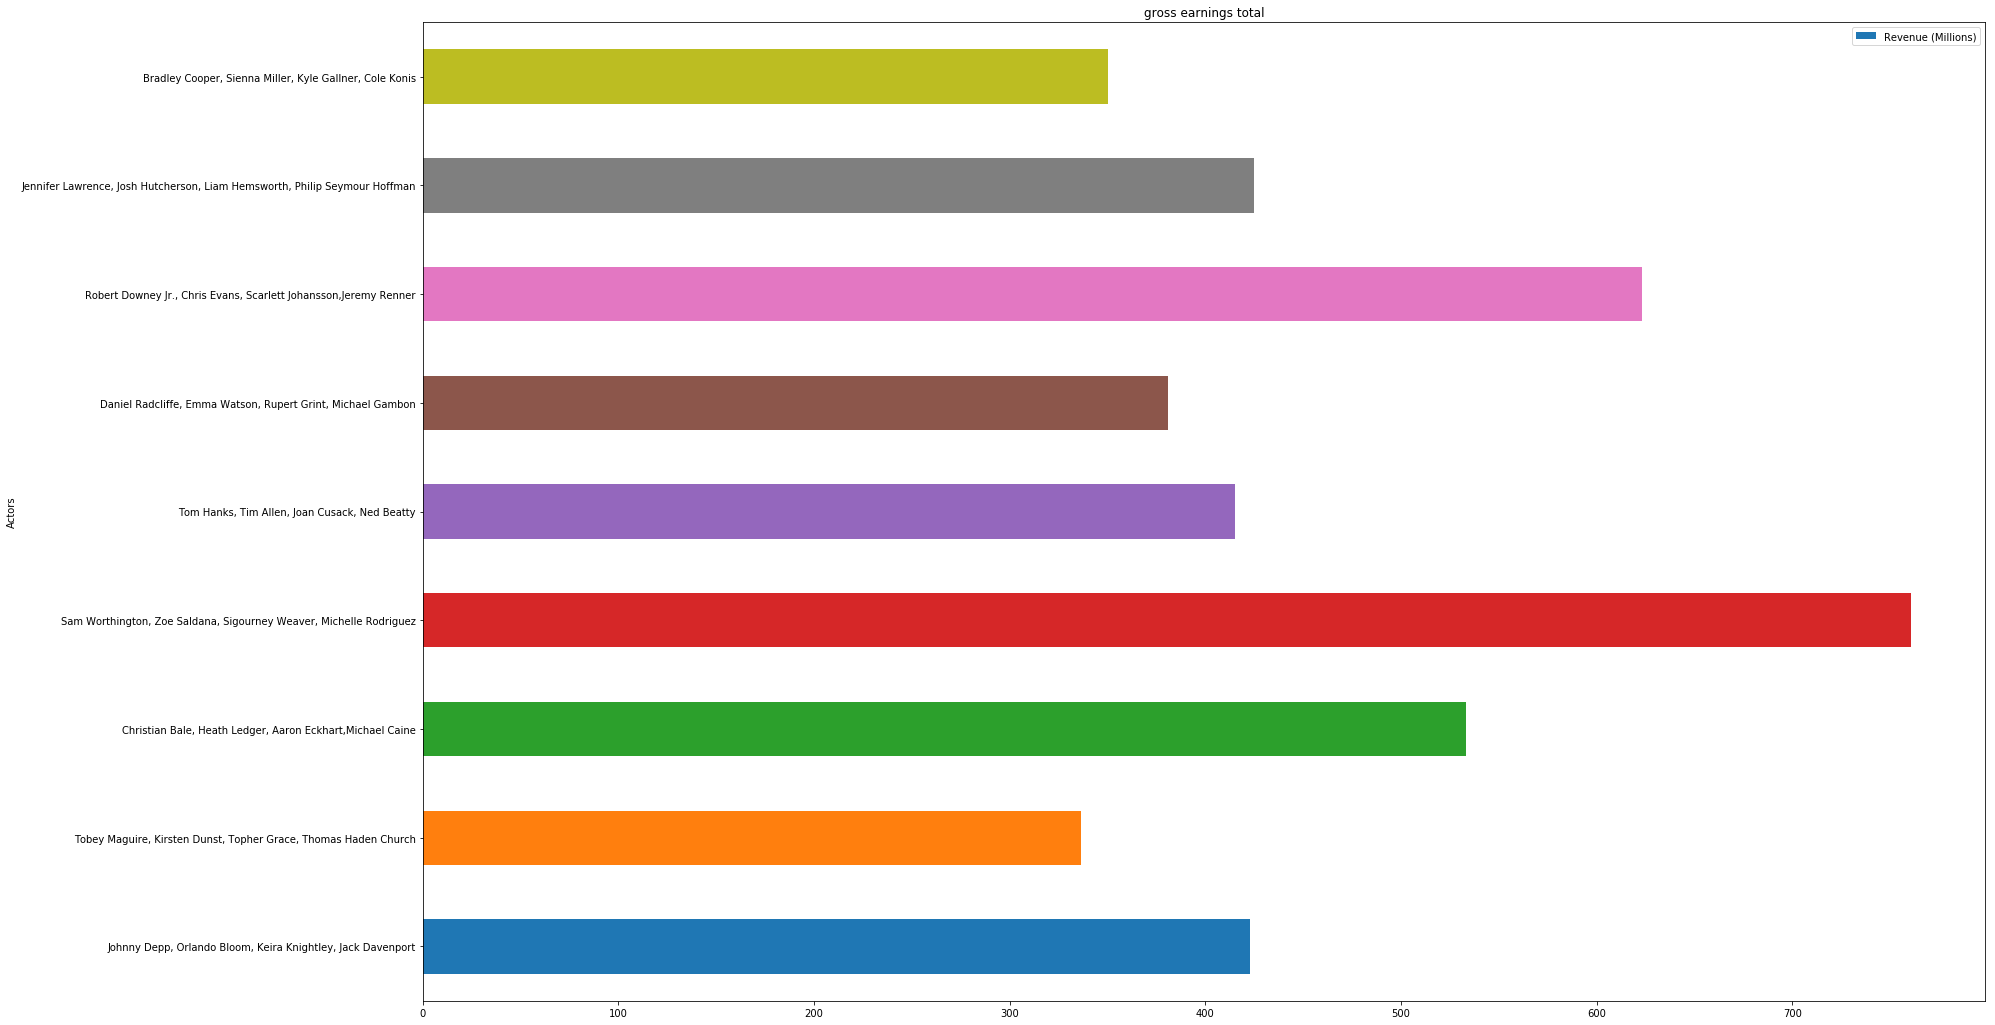

In [41]:
df_cast.iloc[0:9].plot(x='Actors', y='Revenue (Millions)',title='gross earnings total',figsize=(28,18),kind='barh')


# Conclusion: Based on provided data of IMDB's top 1000 movies across the years, we believe the best movie should have the following 3 things
# 1) Genre of one or more of the following: Drama,Mystery,Thriller or sci-fi
# 2) Actors including but not limited to: Zoe Saldana, Sam worthington,Sigourney Weaver,Mitchell Rodriguez
# 3) Directed by any of the following: James Gunn, Anthony Russo,Gareth Edwards or David Ayer